In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from joblib import dump, load
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [52]:
df = pd.read_csv("points_ralentissement_abidjan.csv")

df.head()

,id_point,commune,latitude,longitude,date,heure,type_jour,meteo,evenement,chantier,affluence,taux_congestion
0,P001,Cocody,5.3540,-3.9714,2025-04-01,08:26,Ouvrable,Orage,Manifestation,Oui,46,5
1,P002,Yopougon,5.3670,-4.0701,2025-04-01,08:54,Ouvrable,Nuageux,Aucun,Non,27,2
2,P003,Abobo,5.4234,-4.0155,2025-04-01,08:54,Ouvrable,Pluie,Aucun,Oui,69,5
3,P004,Marcory,5.3053,-3.9981,2025-04-01,08:11,Ouvrable,Nuageux,Aucun,Oui,98,5
4,P005,Plateau,5.3361,-4.0244,2025-04-01,08:12,Ouvrable,Nuageux,Concert,Non,101,5


In [53]:
## Conversion heure en format numérique
df["heure_num"] = df["heure"].str.slice(0, 2).astype(int)

In [54]:
# Convertir la colonne date en format DateTime
df['date'] = pd.to_datetime(df['date'])

In [55]:
df['date_timestamp'] = df['date'].astype('int64') // 10**9

In [56]:
df.head()

,id_point,commune,latitude,longitude,date,heure,type_jour,meteo,evenement,chantier,affluence,taux_congestion,heure_num,date_timestamp
0,P001,Cocody,5.3540,-3.9714,2025-04-01,08:26,Ouvrable,Orage,Manifestation,Oui,46,5,8,1743465600
1,P002,Yopougon,5.3670,-4.0701,2025-04-01,08:54,Ouvrable,Nuageux,Aucun,Non,27,2,8,1743465600
2,P003,Abobo,5.4234,-4.0155,2025-04-01,08:54,Ouvrable,Pluie,Aucun,Oui,69,5,8,1743465600
3,P004,Marcory,5.3053,-3.9981,2025-04-01,08:11,Ouvrable,Nuageux,Aucun,Oui,98,5,8,1743465600
4,P005,Plateau,5.3361,-4.0244,2025-04-01,08:12,Ouvrable,Nuageux,Concert,Non,101,5,8,1743465600


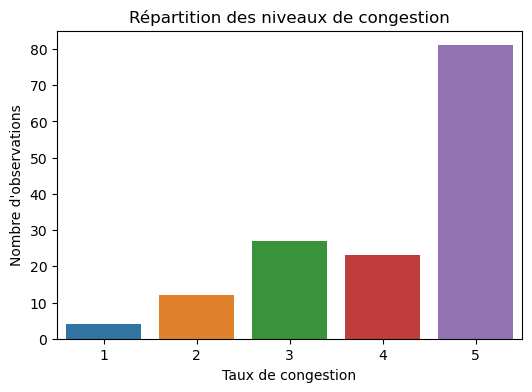

In [57]:
## Répartition des taux de congestion
plt.figure(figsize=(6,4))
sns.countplot(x="taux_congestion", data=df)
plt.title("Répartition des niveaux de congestion")
plt.xlabel("Taux de congestion")
plt.ylabel("Nombre d'observations")
plt.show()

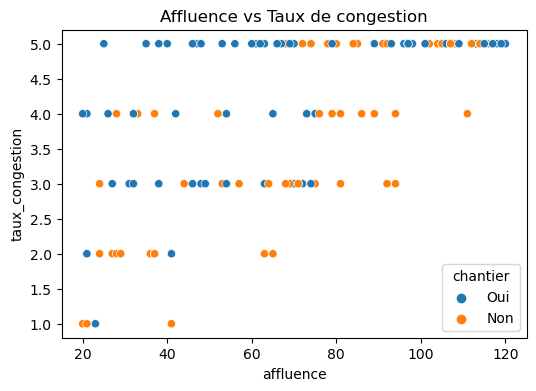

In [58]:
## Corrélation affluence ↔ taux de congestion
plt.figure(figsize=(6,4))
sns.scatterplot(x="affluence", y="taux_congestion", data=df, hue="chantier")
plt.title("Affluence vs Taux de congestion")
plt.show()

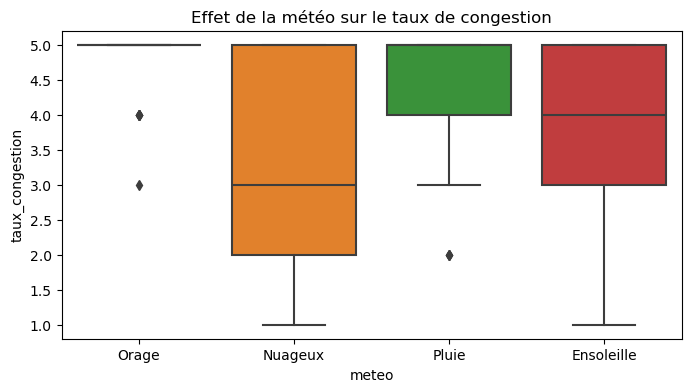

In [59]:
## 3. Impact de la météo
plt.figure(figsize=(8,4))
sns.boxplot(x="meteo", y="taux_congestion", data=df)
plt.title("Effet de la météo sur le taux de congestion")
plt.show()

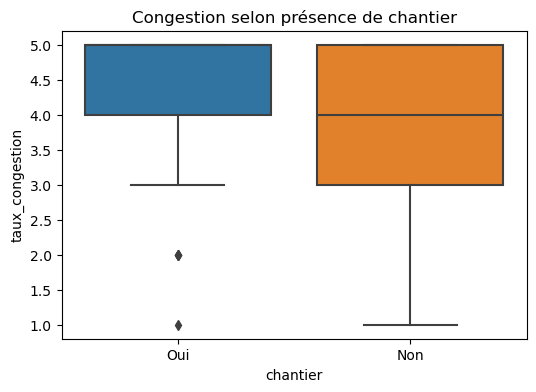

In [60]:
# 4. Effet des chantiers
plt.figure(figsize=(6,4))
sns.boxplot(x="chantier", y="taux_congestion", data=df)
plt.title("Congestion selon présence de chantier")
plt.show()

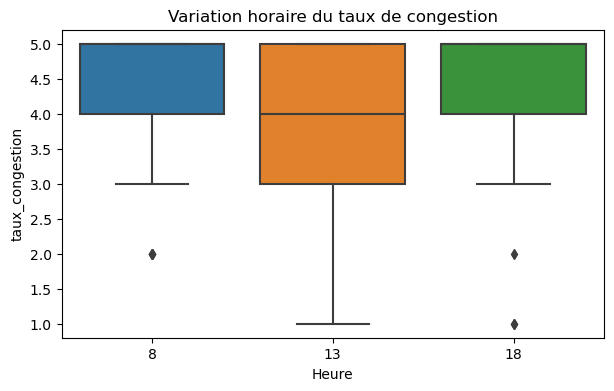

In [61]:
#5. Congestion par heure
plt.figure(figsize=(7,4))
sns.boxplot(x="heure_num", y="taux_congestion", data=df)
plt.title("Variation horaire du taux de congestion")
plt.xlabel("Heure")
plt.show()

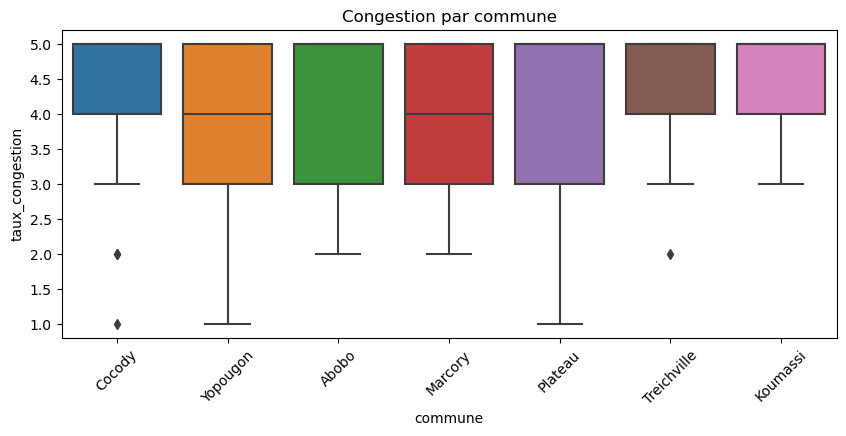

In [62]:
#Congestion par commune
plt.figure(figsize=(10,4))
sns.boxplot(x="commune", y="taux_congestion", data=df)
plt.title("Congestion par commune")
plt.xticks(rotation=45)
plt.show()

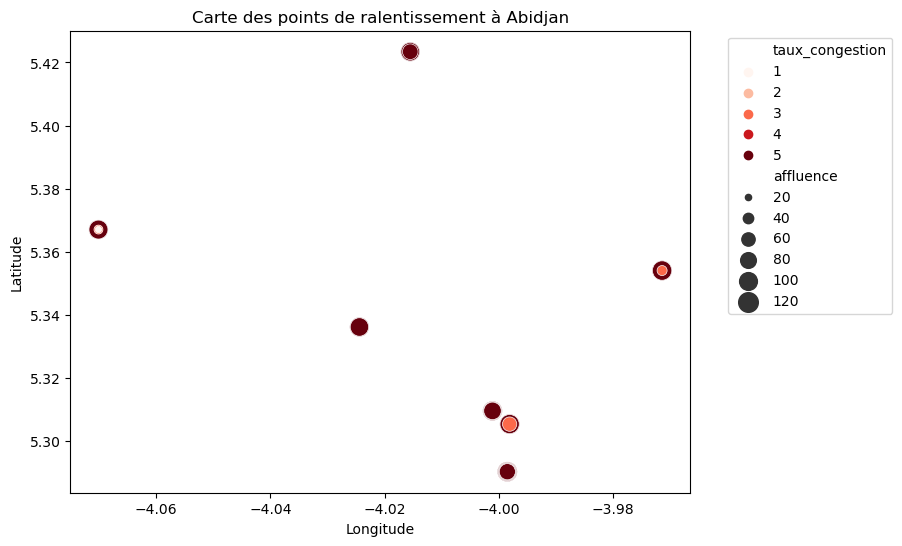

In [63]:
#7. Carte des points avec intensité de congestion
plt.figure(figsize=(8,6))
sns.scatterplot( x="longitude", y="latitude", hue="taux_congestion", size="affluence", sizes=(20, 200), data=df, palette="Reds" )
plt.title("Carte des points de ralentissement à Abidjan")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Sélectionner les features et la cible

In [64]:
X = df[["commune", "meteo", "evenement", "chantier", "type_jour", "affluence", "heure_num", "latitude", "longitude", "date_timestamp"]]
y = df["taux_congestion"]

# Encodage des variables catégorielles

In [65]:
X_encoded = pd.get_dummies(X)

# Séparation en jeu d'entraînement et de test

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Entraînement du modèle

In [67]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Prédiction

In [68]:
y_pred = model.predict(X_test)

# Évaluation

In [69]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R² : {r2:.2f}")

MAE : 0.43
RMSE : 0.67
R² : 0.46


# Visualisation : Prédiction vs Réel

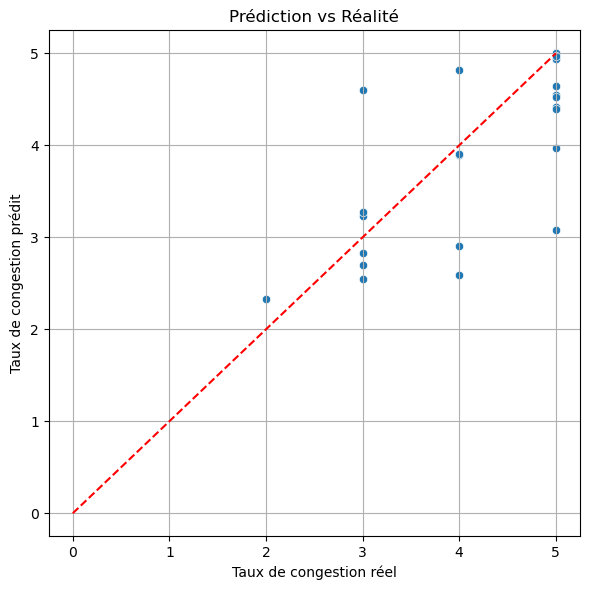

In [70]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([0, 5], [0, 5], '--', color='red')
plt.xlabel("Taux de congestion réel")
plt.ylabel("Taux de congestion prédit")
plt.title("Prédiction vs Réalité")
plt.grid(True)
plt.tight_layout()
plt.show()

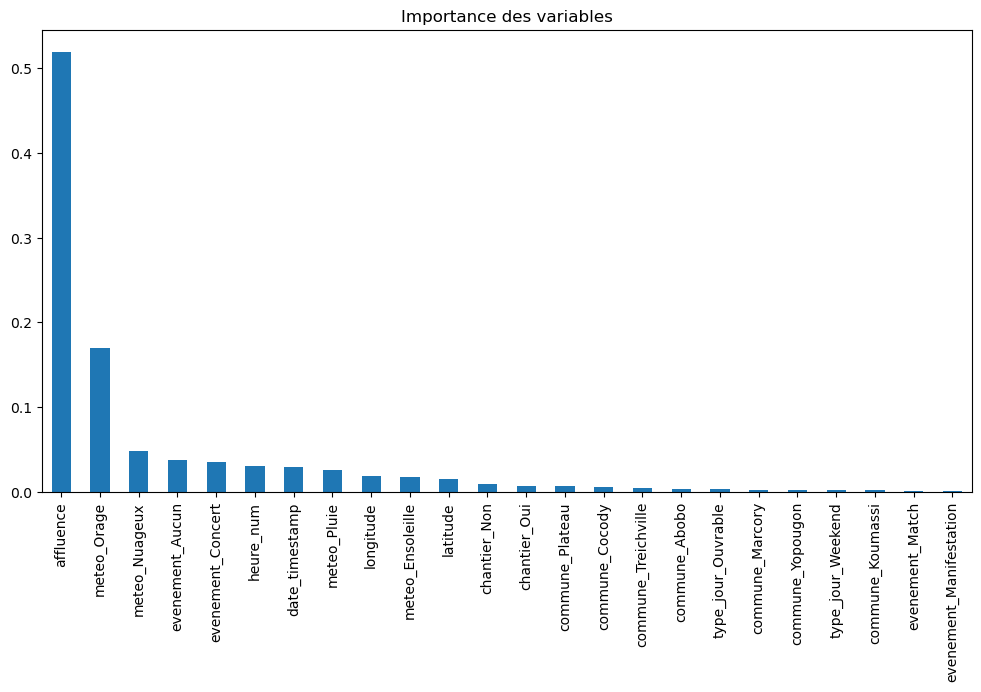

In [71]:
importances = model.feature_importances_
feature_names = X_encoded.columns

feat_importances = pd.Series(importances, index=feature_names)
feat_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.title("Importance des variables")
plt.show()

# Sauvegarder le model et son encodage

In [72]:
dump(model, 'model.joblib')
dump(X_encoded.columns, 'columns.joblib')

['columns.joblib']

In [73]:
# Fonction d'évaluation des modèles
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    return {
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2
    }

In [74]:
# Définition des modèles à tester
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf')
}

# Évaluation de chaque modèle
results = {}
for name, model in models.items():
    print(f"Évaluation de {name}...")
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)

Évaluation de Linear Regression...
Évaluation de Ridge...
Évaluation de Lasso...
Évaluation de Decision Tree...
Évaluation de Random Forest...
Évaluation de Gradient Boosting...
Évaluation de SVR...
Évaluation de Gradient Boosting...
Évaluation de SVR...


Comparaison des performances des modèles :


,Linear Regression,Ridge,Lasso,Decision Tree,Random Forest,Gradient Boosting,SVR
MAE,0.527,0.515,0.592,0.433,0.434,0.461,0.687
RMSE,0.639,0.626,0.743,0.876,0.667,0.620,1.069
R²,0.503,0.524,0.329,0.068,0.458,0.533,-0.391


<Figure size 1200x600 with 0 Axes>

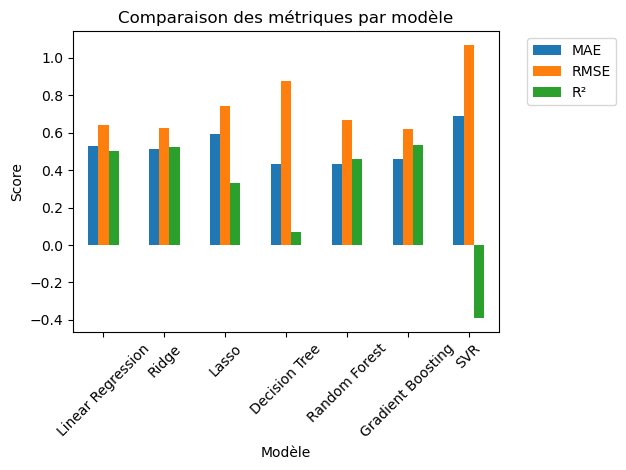

In [75]:
# Affichage des résultats sous forme de tableau
results_df = pd.DataFrame(results).round(3)
print("Comparaison des performances des modèles :")
display(results_df)

# Visualisation des résultats
plt.figure(figsize=(12, 6))
results_df.T.plot(kind='bar')
plt.title("Comparaison des métriques par modèle")
plt.xlabel("Modèle")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [76]:
# Sélection du meilleur modèle basé sur le R²
best_model_name = max(results.items(), key=lambda x: x[1]['R²'])[0]
best_model = models[best_model_name]

print(f"Le meilleur modèle est : {best_model_name}")
print("\nMétriques du meilleur modèle :")
for metric, value in results[best_model_name].items():
    print(f"{metric}: {value:.3f}")

# Sauvegarde du meilleur modèle
dump(best_model, 'best_model.joblib')
dump(X_encoded.columns, 'columns.joblib')

Le meilleur modèle est : Gradient Boosting

Métriques du meilleur modèle :
MAE: 0.461
RMSE: 0.620
R²: 0.533


['columns.joblib']